<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [329]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [330]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [313]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math for 8 grade>**   


Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [210]:
df = df[["AVG_MATH_8_SCORE", "YEAR"]]
df["YEAR"].unique()
x = df["YEAR"].unique() 

print("The number of different years of data in our data set is: ", len(x))

The number of different years of data in our data set is:  33


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [211]:
df = pd.read_csv('../data/states_edu.csv')

df2 = df.set_index("STATE", drop = False)

df2 = df2.loc["MICHIGAN"]
num_valid_math_8_scores_MICHIGAN = df2.loc[:,"AVG_MATH_8_SCORE"].count()
sum_of_valid_math_8_scores_MICHIGAN =  df2.loc[:,"AVG_MATH_8_SCORE"].sum()
avg_math_8_predictor_MICHIGAN = (sum_of_valid_math_8_scores_MICHIGAN / num_valid_math_8_scores_MICHIGAN)

#######################################
df3 = df.set_index("STATE", drop = False)

df3 = df3.loc["OHIO"]
num_valid_math_8_scores_OHIO = df3.loc[:,"AVG_MATH_8_SCORE"].count()
sum_of_valid_math_8_scores_OHIO =  df3.loc[:,"AVG_MATH_8_SCORE"].sum()
avg_math_8_predictor_OHIO = (sum_of_valid_math_8_scores_OHIO / num_valid_math_8_scores_OHIO)


print(avg_math_8_predictor_OHIO)

if avg_math_8_predictor_MICHIGAN > avg_math_8_predictor_OHIO:
    print("Michigan has the higher average predictor score for 8th Grade Math")
    print("Michigan: ", avg_math_8_predictor_MICHIGAN, " > " , " Ohio: ", avg_math_8_predictor_OHIO)
elif(avg_math_8_predictor_MICHIGAN < avg_math_8_predictor_OHIO):
    print("Ohio has the greater average predictor score for 8th Grade Math")
    print("Michigan: ", avg_math_8_predictor_MICHIGAN, " < " , " Ohio:" , avg_math_8_predictor_OHIO)
else:
    print("They have the same average predictor score for 8th Grade Math")

# As you may have noticed, Michigan is set into the first perspective when it comes to logical flows. Ohio is never greater than Michigan. "Michigan" is just
# less than Ohio, and Michigan should rightly come first. I only reserved the Ohio first condition only for when it actually is greater for 8th Grade Math
# Still, this is all for fun, and in all good humor. Go Blue!



282.25
Ohio has the greater average predictor score for 8th Grade Math
Michigan:  276.1666666666667  <   Ohio: 282.25


Find the average for your pedictor score across all states in 2019

In [212]:
df4 = df.set_index("YEAR", drop = False)
df4 = df4.loc[2019]
num_valid_math_8_scores_in_2019 = df4.loc[:,"AVG_MATH_8_SCORE"].count()
sum_valid_math_8_scores_in_2019 = df4["AVG_MATH_8_SCORE"].sum()
avg_math_8_predictor_in_2019 = sum_valid_math_8_scores_in_2019 / num_valid_math_8_scores_in_2019

print("The average Math 8th Grade Predictor Score across all the states in 2019 is : ", avg_math_8_predictor_in_2019)

The average Math 8th Grade Predictor Score across all the states in 2019 is :  281.2641509433962


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [213]:
df5 = df.set_index("STATE", drop = False)
#df5 = df5.loc["DODEA"]
#df5["AVG_MATH_8_SCORE"].max()
# Code above gets us the maximmum predictor score for just one state. I am currently trying to find out how to do this easily, but it seems that I do not know of the
#function that allows me to do this easily... ;_; I'm thinking of a loop, but the indexing could get quite funky.

#df5 = df.set_index("STATE", drop = False)
#df5 = df5[["AVG_MATH_8_SCORE"]].agg({"AVG_MATH_8_SCORE": "max"})
#print(df5)
#Another code test... it seems to give me the same answer, but it gives it for the entire data, instead of giving it to me for each state... 
#YOU KNOW WHAT I'M GONNA BE A MADMAN AND DO IT FOR EVERY SINGLE ONE. EDIT: NVM I tried and realized it's quite futile XD.

#initialize an empty list 
list_of_max_per_state = []

x = df5["STATE"].unique()
list_states_ = list(x)
for i in list_states_:
    df5 = df5.loc[i]
    x = df5["AVG_MATH_8_SCORE"].max() 
    list_of_max_per_state.append( x)
    df5 = df.set_index("STATE", drop = False)

#Now we have the values, but we want to be more specific. Right now the values in the list are the max values for the states in the alphabetical order.
#Then, we can create a hash map (dictionary) for easier identification

#initalize set
max_of_each_state = {}
counter = 0
for i in list_states_:
    max_of_each_state[i] = list_of_max_per_state[counter]
    counter = counter + 1

print(max_of_each_state)

#Somehow it worked out! ^_^

{'ALABAMA': 269.0, 'ALASKA': 283.0, 'ARIZONA': 283.0, 'ARKANSAS': 279.0, 'CALIFORNIA': 277.0, 'COLORADO': 292.0, 'CONNECTICUT': 289.0, 'DELAWARE': 284.0, 'DISTRICT_OF_COLUMBIA': 269.0, 'FLORIDA': 281.0, 'GEORGIA': 281.0, 'HAWAII': 281.0, 'IDAHO': 287.0, 'ILLINOIS': 285.0, 'INDIANA': 288.0, 'IOWA': 286.0, 'KANSAS': 290.0, 'KENTUCKY': 282.0, 'LOUISIANA': 273.0, 'MAINE': 289.0, 'MARYLAND': 288.0, 'MASSACHUSETTS': 301.0, 'MICHIGAN': 280.0, 'MINNESOTA': 295.0, 'MISSISSIPPI': 274.0, 'MISSOURI': 286.0, 'MONTANA': 293.0, 'NEBRASKA': 288.0, 'NEVADA': 278.0, 'NEW_HAMPSHIRE': 296.0, 'NEW_JERSEY': 296.0, 'NEW_MEXICO': 274.0, 'NEW_YORK': 283.0, 'NORTH_CAROLINA': 286.0, 'NORTH_DAKOTA': 293.0, 'OHIO': 290.0, 'OKLAHOMA': 279.0, 'OREGON': 285.0, 'PENNSYLVANIA': 290.0, 'RHODE_ISLAND': 284.0, 'SOUTH_CAROLINA': 282.0, 'SOUTH_DAKOTA': 291.0, 'TENNESSEE': 280.0, 'TEXAS': 290.0, 'UTAH': 287.0, 'VERMONT': 295.0, 'VIRGINIA': 290.0, 'WASHINGTON': 290.0, 'WEST_VIRGINIA': 274.0, 'WISCONSIN': 289.0, 'WYOMING': 289

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [209]:
# I chose to work with the feature of AVG_MATH_8_SCORE across all the states and compare with year by year. I want to see if the Flynn Effect, which states 
# that the general population tends to get smarter as time passes. I wish to see how much noticeable(or maybe not) change there was between 1992 and 2019. 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Final feature list: **AVG_MATH_8_SCORE ACROSS ALL STATES PER YEAR**

Feature selection justification: **I chose to work with the feature of AVG_MATH_8_SCORE across all the states and compare with year by year. I want to see if the Flynn Effect, which states that the general population tends to get smarter as time passes. I wish to see how much noticeable(or maybe not) change there was between 1992 and 2019.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

array([[<AxesSubplot:title={'center':'1986'}>,
        <AxesSubplot:title={'center':'1987'}>,
        <AxesSubplot:title={'center':'1988'}>,
        <AxesSubplot:title={'center':'1989'}>,
        <AxesSubplot:title={'center':'1990'}>,
        <AxesSubplot:title={'center':'1991'}>],
       [<AxesSubplot:title={'center':'1992'}>,
        <AxesSubplot:title={'center':'1993'}>,
        <AxesSubplot:title={'center':'1994'}>,
        <AxesSubplot:title={'center':'1995'}>,
        <AxesSubplot:title={'center':'1996'}>,
        <AxesSubplot:title={'center':'1997'}>],
       [<AxesSubplot:title={'center':'1998'}>,
        <AxesSubplot:title={'center':'1999'}>,
        <AxesSubplot:title={'center':'2000'}>,
        <AxesSubplot:title={'center':'2001'}>,
        <AxesSubplot:title={'center':'2002'}>,
        <AxesSubplot:title={'center':'2003'}>],
       [<AxesSubplot:title={'center':'2004'}>,
        <AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>,
        <A

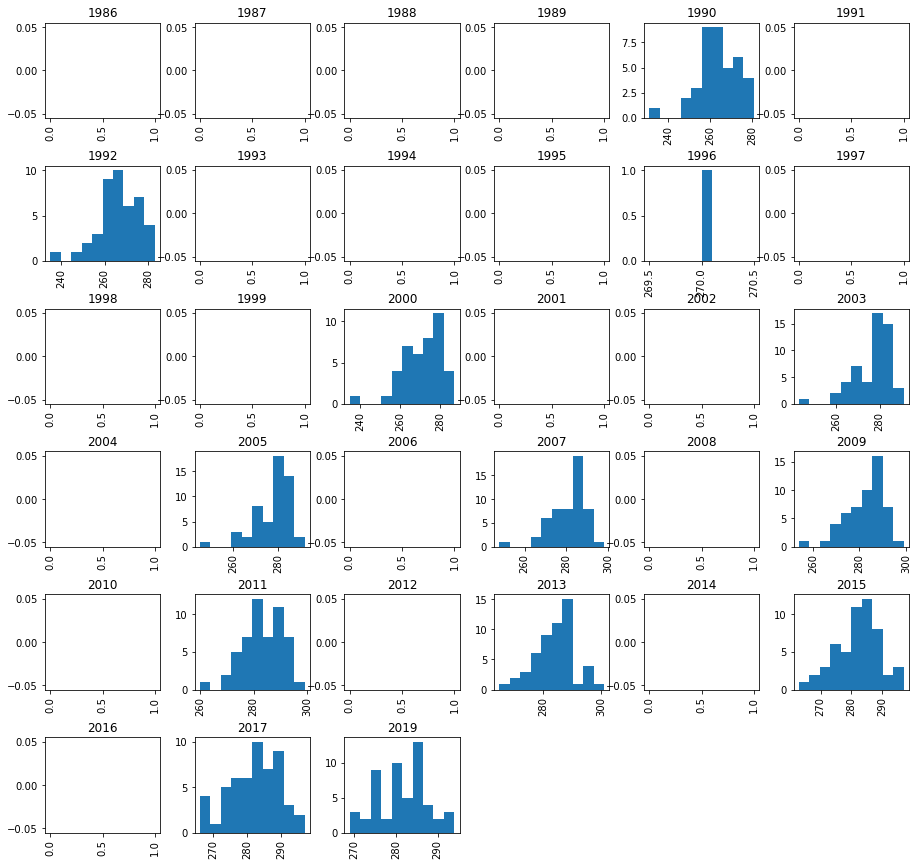

In [277]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

df["AVG_MATH_8_SCORE"].hist(by=df["YEAR"], figsize=(15, 15))

**Bar Chart: The Distribution of AVG_MATH_8_SCORES for all the STATES in EACH YEAR (1992-2019)**

**Visualization 2**

<AxesSubplot:xlabel='YEAR', ylabel='AVG_MATH_8_SCORE'>

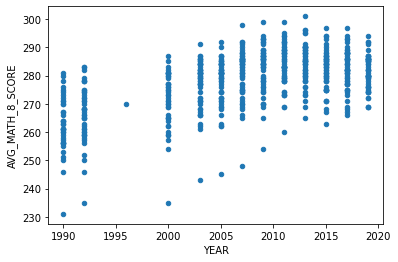

In [278]:
df.plot.scatter(x="YEAR", y="AVG_MATH_8_SCORE")

**Scatter Plot: The Distribution of AVG_MATH_8_SCORE across the timeline of (1992-2019)**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [346]:
from sklearn.model_selection import train_test_split

In [351]:
X = df[['TOTAL_REVENUE', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

#This is where I first run into trouble, and everything after that with ML/Regression tasks my code doesn't seem to like me for some reason. Help!:(

    

In [352]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

#Somemthing about Pylance telling me it's an error, even though this is just a comment... Hmmmm...

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [362]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [361]:
# create your model here
model = LinearRegression()

In [360]:
model.fit(X_train, y_train)

#I'm not even sure where to even begin with this one... 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [363]:
y_pred = model.predict(X_test)

#Keeps giving me errors

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [357]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

#Shook... o_0;;;

ValueError: plot_confusion_matrix only supports classifiers

In [359]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "YEAR"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")


#Error once again... :s


TypeError: 'module' object is not callable

<h2> Summary </h2>

**While I wasn't able to get any findings on the Regression task of this tutorial, looking at my previous plots, I noticed that on average, the 
Scores for the average Math 8 Scores for all the states tend to increase to the right. In other words, the general trend of the scores is rising 
as time passes. While there are many factors to account for, as we can see that we just general get more data as time passes, but overall speaking, with the passage of time, the scores of Math 8 Scores tend to have an upward trend.**